Mulualem Asmare 

Anderson College of Business and Computing, Regis  University 

MSDS692 - Data Science Practicum I

Christy Pearson

March 10, 2024 

#  AI vs Human-Generated Text Classification

## Project Objectives   and Problem Definition
AI is increasingly intertwined in our daily lives. Even though the integration of AI into our daily lives has several benefits, it has the potential to pose a threat to our survival. Identifying whether AI or a human generates the text can allow us to identify fake news, facilitate plagiarism identification, and promote security and privacy. Recognizing the potential threat of AI-generated texts, this project aims to develop a classification model with the best accuracy capable of detecting text  generated by  human. Additionally, the project seeks to identify common patterns inherent in AI-generated and human-generated texts through exploratory data analysis (EDA).
## Project Details
In this project, three datasets obtained from Kaggle and Hugging Face are utilized. The idea here is to combine the three datasets to make a big dataset. Before the unification of the dataset, appropriate exploratory data analysis (EDA) is performed on each dataset. After concatenation of the data for computational efficiency and easy visualization, only 400,000 rows of data are selected from over 7,000,000 rows. Data processing using regular expression (regex) Python module is implemented for preprocessing the text data. Visualization using bar plots and word clouds is implemented to visualize the frequency of words in AI-generated and human-generated tokenized text. Transforming the data into lowercase and removing stopwords before visualization is performed to showcase the most important frequent words in both AI and human-generated texts. Tokenization of the text is implemented to break it into tokens (individual words), and lemmatization is carried out to transform words into their basic root form, reducing dimensionality for improved machine learning model learning. Furthermore, TF-IDF vectorization is applied to convert the text into numerical vectors suitable for machine-learning tasks.

The classification models employed in this project include logistic regression, naive Bayes, random forest, and other models. The model that produces the highest accuracy is selected and tested using some texts that are generated by AI and human. Tools such as Jupyter Notebook in Python 3 are utilized for interacting with and analyzing the data.

## Datasets Sources
1. First dataset called 'Hello-SimpleAI/HC3' is obtained from https://huggingface.co/datasets/Hello-SimpleAI/HC3 using the python code that is used by Yannick Stephan.
2. Second dataset is obtained https://www.kaggle.com/competitions/human-or-machine-generated-text/data?select=train.tbz2
3. The third dataset is collected from Kaggle NaveenFream. (2023, September 22). Ai-and-human text. Kaggle. https://www.kaggle.com/datasets/naveenfream/ai-and-human-text

## Import Libraries

In [123]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint 
from datasets import load_dataset
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## Data Collection, Cleaning, and Preprocessing

In this section of the project, we will collect the three datasets, clean them, and preprocess them for easy concatenation.

we will collect the first dataset from https://huggingface.co/datasets/Hello-SimpleAI/HC3 using the code provided by NaveenFream. For more information, please refer to the references.

In [2]:
#Orginal code source https://huggingface.co/datasets/Hello-SimpleAI/HC3

#Used to Load all the dataset from Huggingface 
hello_dataset = load_dataset("Hello-SimpleAI/HC3", name="all")
hello_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'human_answers', 'chatgpt_answers', 'source'],
        num_rows: 24322
    })
})

In the above, we checked that the entire data is successfully loaded  from Huggingface. The data contains 5 columns and 24322 rows. Let's load only the training dataset and examine its contents using the pandas head function.

In [3]:
#Used to Load only the training dataset as dataframe 
hello_df = pd.DataFrame(hello_dataset['train'])
hello_df.head()

,id,question,human_answers,chatgpt_answers,source
0,0,"Why is every book I hear about a "" NY Times # ...","[Basically there are many categories of "" Best...",[There are many different best seller lists th...,reddit_eli5
1,1,"If salt is so bad for cars , why do we use it ...",[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...,reddit_eli5
2,2,Why do we still have SD TV channels when HD lo...,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...,reddit_eli5
3,3,Why has nobody assassinated Kim Jong - un He i...,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...,reddit_eli5
4,4,How was airplane technology able to advance so...,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...,reddit_eli5


Now that we have downloaded the training data from Hugging Face, let's check the column names.

In [4]:
#Used to Check column names
hello_df.columns

Index(['id', 'question', 'human_answers', 'chatgpt_answers', 'source'], dtype='object')

For developing a model to classify text as either human-generated or AI-generated, we only need the text generated by humans and ChatGPT. Also, keeping the "Id" column for tracking changes is vital.

In [5]:
# Selecting the important features and saving them as a new DataFrame.
hello_df = hello_df.drop(['question', 'source'], axis=1)
hello_df.head()

,id,human_answers,chatgpt_answers
0,0,"[Basically there are many categories of "" Best...",[There are many different best seller lists th...
1,1,[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...
2,2,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...
3,3,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...
4,4,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...


Now, I see that the important columns are selected. We will use the melt function next to transform the DataFrame from wide format to long format since we want the two columns to be in one column. This is important to create another column that will contain labels for human-generated and AI-generated.

In [6]:
#Used to transform the DataFrame from wide format to long format
hello_df = pd.melt(hello_df, id_vars='id', var_name='text_source', value_name='output_text')

#Drop the id column 
hello_df = hello_df.drop(columns= 'id')

# get 10 samples
hello_df.sample(10) 

,text_source,output_text
16395,human_answers,"[Wikipedia does n't know what they 're for , u..."
648,human_answers,[You have to meet two criteria in order to be ...
16260,human_answers,[Online storage is generally seen as the way o...
997,human_answers,[Expense and privacy concerns . If a police of...
38208,chatgpt_answers,"[If Coca-Cola stopped advertising for a year, ..."
20427,human_answers,[I believe it is so. It doesn't sound like th...
46155,chatgpt_answers,[The Federal Reserve (FED) is the central bank...
13493,human_answers,[Because it can result in permanent damage to ...
5285,human_answers,[Nearly every animal that raises its young wil...
687,human_answers,"[Depending on what the card is , it can show k..."


Now that the data is restructured into long format, we will replace the 'human_answers' generated by a human and label it as 1, and label 'chatgpt_answers' as 0.

In [7]:
#Used to replace 'human_answers' with 1 and 'chatgpt_answers' with 0
hello_df['text_source'] = hello_df['text_source'].replace({'human_answers': 1,'chatgpt_answers':0} )

In [8]:
hello_df.sample(10)

,text_source,output_text
24287,1,[Hi thanks for writing to health care magic.I ...
10771,1,[Water without impurities boils at 100degrees ...
22914,1,[The creditors will not be able to go after hi...
11116,1,[Obamacare mandates that you buy healthcare in...
31425,0,[St. Patrick's Day is a holiday that celebrate...
31161,0,[Smartwatch heart rate monitors work by shinin...
41938,0,[A button-down shirt is a type of shirt that h...
23989,1,"[If he feels guilt after his behavior, medicat..."
70,1,[Because those are the people who live in less...
26075,0,[Certainly! I'd be happy to give you a basic o...


To enhance visualization and clarification, we will use the following code to place the 'output_text' column to the left of the 'text_source' column.

In [9]:
# Used to reversing the order of the columns.
hello_df = hello_df.iloc[:, ::-1]
hello_df.head()

,output_text,text_source
0,"[Basically there are many categories of "" Best...",1
1,[salt is good for not dying in car crashes and...,1
2,[The way it works is that old TV stations got ...,1
3,[You ca n't just go around assassinating the l...,1
4,[Wanting to kill the shit out of Germans drive...,1


Now that the columns are in the order we wanted, let's check for any empty rows, as having empty rows can lead to biased results and inaccuracies in modeling.

In [10]:
# checking is there is empty rows
hello_df.isna().sum()

output_text    0
text_source    0
dtype: int64

Check the datatypes for each column in the dataset to ensure consistency with other datasets that I need to concatenate later.

In [11]:
#Check the datatypes
hello_df.dtypes

output_text    object
text_source     int64
dtype: object

Here, we observed that the 'output_text' is of object datatype, and 'text_source' is of int datatype. Now, the first dataset is set for the next step of data processing. Let's proceed to get the second dataset.

## Load Second Dataset

This dataset is obtained from Kaggle: Human or machine-generated text?.Kaggle. (n.d.).  https://www.kaggle.com/competitions/human-or-machine-generated-text/data?select=train.tbz2 

In [12]:
# Read the CSV file and retrieve the first 5 rows 
human_machin_gen_text = pd.read_csv('/Users/mulualemasmare/Downloads/train.txt', delimiter='\t') 
human_machin_gen_text.head()

,id,context,response,human-generated
0,0,<first_speaker> 9@@ 5 de@@ gre@@ es with <numb...,<second_speaker> <at> i forgot that thank@@ s@...,0
1,1,<first_speaker> <at> <at> y@@ ar ! o@@ y just ...,<first_speaker> <at> lol b we 'll see . we hea...,0
2,2,<first_speaker> ohh ! de@@ u cer@@ to ! ! dddd...,<second_speaker> <at> ac@@ or@@ de@@ i ag@@ or...,1
3,3,<first_speaker> ugh@@ hhh i wanted a pic@@ kle...,<second_speaker> <at> lol g@@ m,0
4,4,<first_speaker> <at> <at> <at> need to know to...,"<first_speaker> <at> ok , will do - don 't be ...",1


Before we modify the dataset, we will create a copy. Creating a copy ensures that the original dataset is unchanged.

In [13]:
#Used to make a copy of the dataset
human_machin_gen_text_copy=human_machin_gen_text.copy()
human_machin_gen_text_copy.head()

,id,context,response,human-generated
0,0,<first_speaker> 9@@ 5 de@@ gre@@ es with <numb...,<second_speaker> <at> i forgot that thank@@ s@...,0
1,1,<first_speaker> <at> <at> y@@ ar ! o@@ y just ...,<first_speaker> <at> lol b we 'll see . we hea...,0
2,2,<first_speaker> ohh ! de@@ u cer@@ to ! ! dddd...,<second_speaker> <at> ac@@ or@@ de@@ i ag@@ or...,1
3,3,<first_speaker> ugh@@ hhh i wanted a pic@@ kle...,<second_speaker> <at> lol g@@ m,0
4,4,<first_speaker> <at> <at> <at> need to know to...,"<first_speaker> <at> ok , will do - don 't be ...",1


According to the dataset source, the data is preprocessed with BPE encoding, which is used for tokenization or text compression. The authors recommend using the code below to properly print a readable text message.

In [14]:
#Used to replace the '@@' in order to change it into a useful format for future data analysis.
human_machin_gen_text_copy['context'] = human_machin_gen_text_copy['context'].apply(lambda x: x.replace('@@ ', ''))
human_machin_gen_text_copy['response'] = human_machin_gen_text_copy['response'].apply(lambda x: x.replace('@@ ', ''))

The above code is used to remove the '@@' symbols, which are used by BPE encoding to indicate the succession of a token. Replacing them with an empty string is important for making the text readable for further analysis.

In [15]:
# Observing the first 5 rows
human_machin_gen_text_copy.head()

,id,context,response,human-generated
0,0,<first_speaker> 95 degrees with <number> % hum...,<second_speaker> <at> i forgot that thanksabit...,0
1,1,<first_speaker> <at> <at> yar ! oy just appear...,<first_speaker> <at> lol b we 'll see . we hea...,0
2,2,<first_speaker> ohh ! deu certo ! ! dddddddddd...,"<second_speaker> <at> acordei agora , qqqqq ? ...",1
3,3,<first_speaker> ughhhh i wanted a pickle . non...,<second_speaker> <at> lol gm,0
4,4,<first_speaker> <at> <at> <at> need to know to...,"<first_speaker> <at> ok , will do - don 't be ...",1


In the 'context' column, the text is human-generated according to the data source. Therefore, we will drop that column and focus on the 'response_text,' which contains text generated by both AI and humans, and the 'human_generated' column that contains labels. A label of 1 indicates human-generated, and a label of 0 indicates AI-generated.

In [16]:
#Used to drop the irrelevant features
human_machin_gen_text_copy = human_machin_gen_text_copy.drop(['id','context'], axis=1)
human_machin_gen_text_copy.head()

,response,human-generated
0,<second_speaker> <at> i forgot that thanksabit...,0
1,<first_speaker> <at> lol b we 'll see . we hea...,0
2,"<second_speaker> <at> acordei agora , qqqqq ? ...",1
3,<second_speaker> <at> lol gm,0
4,"<first_speaker> <at> ok , will do - don 't be ...",1


To concatenate this dataset with the other two datasets, we will change the 'response' column to 'output_text' and the 'human-generated' features to 'text_source.' This adjustment will enable us to combine them with other datasets, as they will have the same feature names, facilitating the concatenation process along the rows.

In [17]:
# Used for changing the column names to facilitate concatenation with other datasets.
human_machin_gen_text_copy.rename(columns={'response': 'output_text', 'human-generated': 'text_source'}, inplace=True)
human_machin_gen_text_copy.head(20)

,output_text,text_source
0,<second_speaker> <at> i forgot that thanksabit...,0
1,<first_speaker> <at> lol b we 'll see . we hea...,0
2,"<second_speaker> <at> acordei agora , qqqqq ? ...",1
3,<second_speaker> <at> lol gm,0
4,"<first_speaker> <at> ok , will do - don 't be ...",1
5,<second_speaker> <at> we talked about this yo ...,1
6,<second_speaker> <at> still taking them ? what...,1
7,<second_speaker> <at> * shakes her head * no ....,1
8,<first_speaker> <at> i don 't know what to do ...,0
9,<second_speaker> <at> the fans inbetween dont ...,1


The words 'first_speaker','second_speaker',<third_speaker> and 'at' have no use for our analysis. Since our goal is to develop a machine learning algorithm that can predict whether the text is from AI or human, keeping these words holds no value for our analysis. Therefore, I will replace them with spaces.

In [18]:
# Used to replacing unnecessary words with spaces.
human_machin_gen_text_copy['output_text'] = human_machin_gen_text_copy['output_text'].str.replace('<first_speaker>', '').str.replace('<second_speaker>', '').str.replace('<at>', '').str.replace('<third_speaker>', '')
human_machin_gen_text_copy.head(20)

,output_text,text_source
0,i forgot that thanksabit i feel exactly like...,0
1,lol b we 'll see . we hearing the bangin ' s...,0
2,"acordei agora , qqqqq ? qqqqq ? this is the ...",1
3,lol gm,0
4,"ok , will do - don 't be late though , you '...",1
5,we talked about this yo ! goodmorning shawn !,1
6,still taking them ? what 's the call in numb...,1
7,* shakes her head * no . i was just dreaming...,1
8,i don 't know what to do with it . i don 't ...,0
9,the fans inbetween dont have the kneejerk re...,1


In [19]:
#Checking dtypes
human_machin_gen_text_copy.dtypes

output_text    object
text_source     int64
dtype: object

In [20]:
#Checking missing values
human_machin_gen_text_copy.isna().sum()

output_text    0
text_source    0
dtype: int64

Here, we observe that the dataset has columns with the same datatypes as our first dataset and contains no missing values. Now, the second dataset is ready for concatenation with the first dataset for further analysis. Before that, let's obtain the third dataset and preprocess it for concatenation with the first and second datasets.

## Load Third Dataset
This dataset is obtained from Kaggle NaveenFream. (2023, September 22). Ai-and-human text. Kaggle. https://www.kaggle.com/datasets/naveenfream/ai-and-human-text 

In [21]:
# Read the CSV file 
ai_human_text = pd.read_csv("/Users/mulualemasmare/Downloads/AI-and-human-text.csv")
ai_human_text.head()

,Unnamed: 0,text,class
0,0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,AI-Generated-Text
1,1,Mount Washington is a peak in the White Mount...,AI-Generated-Text
2,2,Acer hillsi is an extinct maple species that w...,AI-Generated-Text
3,3,Derrick George Sherwin (16 April 1936 – 17 Oct...,Human-Generated-Text
4,4,The Windows shell is the graphical user interf...,Human-Generated-Text


In [22]:
# Create a copy before modifying the dataset.
ai_human_text_copy=ai_human_text.copy()
ai_human_text_copy.head()

,Unnamed: 0,text,class
0,0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,AI-Generated-Text
1,1,Mount Washington is a peak in the White Mount...,AI-Generated-Text
2,2,Acer hillsi is an extinct maple species that w...,AI-Generated-Text
3,3,Derrick George Sherwin (16 April 1936 – 17 Oct...,Human-Generated-Text
4,4,The Windows shell is the graphical user interf...,Human-Generated-Text


In [23]:
#Check the dtypes
ai_human_text_copy.dtypes

Unnamed: 0     int64
text          object
class         object
dtype: object

Here, the dataset contains an unnamed column that is not important for our analysis, so we will drop it. The 'class' feature is of object type, and it contains string text indicating whether the text is generated from AI or a human. To concatenate it with our other dataset, we need to change the feature names to be identical to the other datasets. Additionally, we need to transform the 'class' feature output into 0s for AI-generated text and 1s for human-generated text for consistency. First, let's replace the labels in the 'class' column: 1 for human-generated text and 0 for AI-generated text.

In [24]:
# Used for replacing the class output labels with 0 for AI-generated text and 1 for human-generated text.
ai_human_text_copy['class'].replace(['AI-Generated-Text', 'Human-Generated-Text'], value=[0, 1], inplace=True)
ai_human_text_copy.head()

,Unnamed: 0,text,class
0,0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,0
1,1,Mount Washington is a peak in the White Mount...,0
2,2,Acer hillsi is an extinct maple species that w...,0
3,3,Derrick George Sherwin (16 April 1936 – 17 Oct...,1
4,4,The Windows shell is the graphical user interf...,1


Now that the class label is changed into 0s and 1s, let's change the feature name 'text' to 'output_text' and 'class' to 'text_source' for consistency with the first and second datasets. 

In [25]:
# Used to rename the columns for smooth concatenation with other datasets.
ai_human_text_copy.rename(columns={'text': 'output_text', 'class': 'text_source'},inplace=True)
ai_human_text_copy.head()

,Unnamed: 0,output_text,text_source
0,0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,0
1,1,Mount Washington is a peak in the White Mount...,0
2,2,Acer hillsi is an extinct maple species that w...,0
3,3,Derrick George Sherwin (16 April 1936 – 17 Oct...,1
4,4,The Windows shell is the graphical user interf...,1


Now that the column names are changed, let's drop the 'Unnamed: 0' column, as it has no use for our analysis.

In [26]:
#Drop unnessery feature 
ai_human_text_copy.drop('Unnamed: 0', axis=1, inplace=True)
ai_human_text_copy.head(1)

,output_text,text_source
0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,0


The 'Unnamed' column has been dropped. Let's check the datatype and missing values for consistency with the other datasets

In [27]:
#Checking the dtypes
ai_human_text_copy.dtypes

output_text    object
text_source     int64
dtype: object

In [28]:
#Checking missing values
ai_human_text_copy.isna().sum()

output_text    0
text_source    0
dtype: int64

The dataset contains the same datatypes as the first and second datasets and has no missing rows. Now, all three datasets are ready to be concatenated. Let's concatenate the three datasets into one dataset."

## Dataset Unification

In [29]:
#Unifying the three datasets along the rows since they have the same column names but different indexes
concat_df = pd.concat([hello_df, human_machin_gen_text_copy, ai_human_text_copy], axis=0)
concat_df.sample(10)

,output_text,text_source
3322514,ofniet word helemaal leip man meet the botsa...,1
2693923,is golfing buddy ! ? ! ? ! what you talkin b...,0
3478574,parang kasi kayo eh cause like she keps on h...,1
6314600,just shovel it lol,1
7060657,i 'm good . how are you ?,0
62444,Burgos Wind Farm is a wind farm located in Bur...,0
3525755,chin up comedian - jo goals and proud mr run,0
1824854,i don 't get it,0
3860956,pretty sure you are never pale .,1
2254046,haha nee ik was deze weel al <number> x gewe...,0


In [30]:
# Used to check if there are null rows
concat_df.isnull().sum()

output_text    0
text_source    0
dtype: int64

In [31]:
#Checking dtype of the unifying dataset
concat_df.dtypes

output_text    object
text_source     int64
dtype: object

In [32]:
# checking the dimension of the df
concat_df.shape

(7539620, 2)

The concatinated dataset has 7539620 rows and 2 columns it has no missing values and has datatypes int  for text source 1 for human orginated and 0 for AI orginated and also has a datypte object for column output_text which contain the output text.

Since the data contains more than 7 million rows and two columns, for computational efficiency, visualization, and efficient model selection and tuning, we will use a subset of data that contains 400,000 rows.

In [33]:
# Used to subset the concatinated data selected 400000 to reduce the computitinal Load
concat_subset_data = concat_df.sample(n=400000, random_state=42)  

In [34]:
concat_subset_data.shape

(400000, 2)

In [35]:
#Checking dtype of the unifying dataset
concat_subset_data.dtypes

output_text    object
text_source     int64
dtype: object

Since the datatype for 'output_text' is object, it is beneficial to change it to string datatype for simplifying handling, manipulation, and extraction of information. Also, it is advantageous to make this change since most machine learning models are designed to work with both string and numerical datasets.

One noteworthy thing I observed during my data analysis was that without using the code provided below, I consistently encountered a TypeError: expected string or bytes-like object during the data preprocessing steps. However, the code below resolved the issue.

In [36]:
# Used to change the output_text into string
concat_subset_data['output_text'] = concat_subset_data['output_text'].astype(str)

## Exploratory Data Analysis (EDA) 

In [37]:
concat_subset_data.head(20)

,output_text,text_source
1242569,nice . my fam 's all in baguio . love it there,0
2261157,smh my bad see when you said stay up i didnt...,1
6339599,this web site is bugging and giving away the...,1
157183,"where the blue eyed monster at ? u , him and...",1
4466378,who is the better defender at <number> b - -...,1
1592051,i am doing quite well how are you mister geo...,0
6921125,i don 't think i 've ever seen it .,0
128757,,0
4053296,i havent heard that one . ima look for it,1
4414072,he didn to win it tho . where you are at ! w...,0


In [38]:
concat_subset_data.tail(20)

,output_text,text_source
115818,u know what i mean . i don 't understand why...,0
5859971,that ur picture i find it too too funny ! !,1
4614136,i just noticed that too . i was like oh ok ....,0
1637553,can you handle playing the largest free text...,1
6239322,"i 'm not a fan of him , but i 'm not a fan o...",0
5549578,ewww ! ! ! ! !,0
5370246,no i 'm not,0
212675,Escondido Village at Valley and Ash in Escondi...,0
398507,i 'm sure you 'll find a way to do it .,0
1526523,"darn , where did u find it ?",1


The above output shows that the 'output_text' column contains special characters, capital letters, and newline characters. Removing the special characters, numerical values, and changing all to lowercase can increase the efficiency and accuracy of the model, as well as the consistency of the data analysis. Moreover, for smoother tokenization, removing the newline character is advantageous.

## Data Preprocessing

In [39]:
#Orginal Code is obtained from MSDS 680 and it is modified  to preprocessing the output_text column

def preprocess (output_text):
    # substituting  URLs with an empty string    
    output_text = re.sub(r'http\S+', '', output_text)
    
    # Convert words  to lowercase
    output_text = output_text.lower()
    
    # Remove non-alphanumeric characters and punctuation
    output_text = re.sub(r'[^a-zA-Z0-9\s]', '', output_text)
    
    # Remove numerical characters
    output_text = re.sub(r'\d+', '', output_text)
    
    # Remove newline characters
    output_text = output_text.replace('\n', '')
    
    return output_text

Using the above code, we cleaned the output text by removing URLs, non-alphanumeric, punctuation, numerical characters, new line characters, and changed the letters into lowercase with an empty string. Now, let's apply the changes to the 'output_text' column.

In [40]:
# Apply the preprocessing function to the 'output_text' column in the DataFrame
concat_subset_data['output_text'] = concat_subset_data['output_text'].apply(preprocess)

#Check if the preprocessing is performed
concat_subset_data.head(10)

,output_text,text_source
1242569,nice my fam s all in baguio love it there,0
2261157,smh my bad see when you said stay up i didnt...,1
6339599,this web site is bugging and giving away the...,1
157183,where the blue eyed monster at u him and c...,1
4466378,who is the better defender at number b you...,1
1592051,i am doing quite well how are you mister geoff,0
6921125,i don t think i ve ever seen it,0
128757,,0
4053296,i havent heard that one ima look for it,1
4414072,he didn to win it tho where you are at wha...,0


In this case, the 'output_text' column is much cleaner than before. Also, we noticed that there is a row shown as 128757 which has no entries. Since having rows or columns with missing values can introduce noise in the machine learning model, let's investigate if there are more 'NA' values.

In [41]:
concat_subset_data.isna().sum()

output_text    0
text_source    0
dtype: int64

Here, it shows that there are no missing values. Therefore, we will use this data as it is to develop the model. If we observe overfitting in the machine learning models that we will develop later, we will use text truncation or text clipping to avoid the inclusion of rows that show no text in them. Since having these rows may introduce noise and produce a biased model, it is important to address this issue.

Let's continue investigating the top 15 most common words used by AI and human-generated text to see if we can identify any patterns.

We will lemmatize to change the words into their base form, using the WordNet Lemmatizer. Unlike other lemmatizers, such as the Porter Stemmer, which can be overly aggressive in stemming and produce words that lack meaning, the WordNet Lemmatizer is chosen to reduce words to their meaningful base forms. We will also use tokenization to break down the text into individual units which will be important to count each tokens. Finally, we'll utilize a counter to count the most and least frequently used words in AI versus human-generated text.

In [42]:
# Create a variable containging the stopwords in english
stop_words= set(nltk.corpus.stopwords.words('english'))

In [43]:
# Create instance for word net lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [44]:
#The original code was obtained from MSDS680 but has been modified.

# Used to lemmatize the 'output_text' column in subset data
concat_subset_data['output_text'] = concat_subset_data['output_text'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))

# Used to separate messages into human-generated
human_generated = concat_subset_data[concat_subset_data['text_source'] == 1]['output_text']

# Used to combine all human-generated text into a single string for better tokenization
all_human_generated_text = ' '.join(human_generated)

# Used to Tokenize
human_words = word_tokenize(all_human_generated_text)

# Used to remove stopwords
stop_words = set(stopwords.words('english'))
filtered_human_words = [word.lower() for word in human_words if word.isalpha() and word.lower() not in stop_words]

# Used to get the count of each words in human
human_text_word_counts = Counter(filtered_human_words) 


Now that we have obtained the word counts in human-generated text, let's print the top and least used words in human-generated text.

In [45]:
#The original code was obtained from MSDS680 but has been modified.

# Used to Print the Top 15 most frequent words on Human generated text
print("Top 15 Most Frequently used Words on Human Generated Text:")
for word, count in human_text_word_counts.most_common(25):
    print(f'{word}: {count}')
    
#Used to print the Least 15 frequent words in human generated Text
print("Least 15 Frequently Used Words in Human Generated Text:")
for word, count in human_text_word_counts.most_common()[-10:]:
    print(f"{word}: {count}")

Top 15 Most Frequently used Words on Human Generated Text:
wa: 37789
number: 28048
lol: 21464
u: 17657
like: 15185
one: 12535
get: 12203
know: 11373
good: 9203
time: 9155
love: 8935
ha: 8784
day: 8125
url: 7895
got: 7766
go: 7572
make: 7407
want: 7288
haha: 7266
think: 7248
well: 7127
would: 7030
see: 6980
going: 6542
also: 6204
Least 15 Frequently Used Words in Human Generated Text:
cetus: 1
declination: 1
dimmer: 1
deepsky: 1
nakedeye: 1
fainter: 1
dropoff: 1
appswork: 1
felching: 1
quap: 1


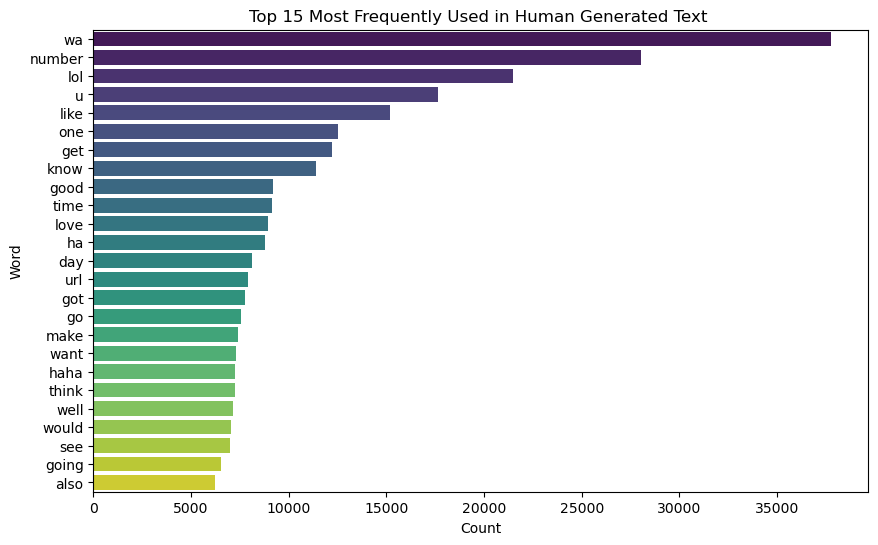

In [46]:
# Used to create a DataFrame for visualization of word count
word_counts_df = pd.DataFrame(human_text_word_counts.items(), columns=['Word', 'Count'])

# Used to sort the DataFrame by count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Used to plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=word_counts_df.head(25), palette='viridis')
plt.title('Top 15 Most Frequently Used in Human Generated Text ')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

Based on the results above, "wa" has appeared 37,789 times in the human-generated text, followed by "number" with 28,048 occurrences, "lol" with 21,464 occurrences, "u" with 17,657 occurrences, "like" with 15,185 occurrences, "one" with 12,535 occurrences, "get" with 12,203 occurrences, "know" with 11,373 occurrences, "good" with 9,203 occurrences, "time" with 9,155 occurrences, "love" with 8,935 occurrences, "ha" with 8,784 occurrences, "day" with 8,125 occurrences, "url" with 7,895 occurrences, and "got" with 7,766 occurrences, making them the most frequently used words. On the other hand, words like "alopians," "olopians," "alpians," and "alpha" are among the least used words in human-generated text.

Let's separate the AI-generated text and identify the top and least 15 frequently used words in the AI-generated text. This will enable us to observe if there are any variations or patterns in the text generated by AI compared to human texts. Doing this can give us some idea about the value of these words in order to identify the text as either human-generated or AI-generated.

In [47]:
# Used to separate the AI generated text from output text 
ai_generated = concat_subset_data[concat_subset_data['text_source'] == 0]['output_text']

# Used to combine all human-generated text into a single string for better tokenization
all_ai_generated_text = ' '.join(ai_generated)

# Used to tokenize
ai_words = word_tokenize(all_ai_generated_text)

# Used to remove stopwords
filtered_ai_words = [word.lower() for word in ai_words if word.isalpha() and word.lower() not in stop_words]

# Used to get the count of each AI generated words
ai_text_word_counts = Counter(filtered_ai_words) 


Since we have the counts of the AI-generated text, we can investigate the top 15 and the least 15 words in the AI-generated text.

In [48]:
# Print the top 15 most frequent words in AI generated text 
print("Top 15 AI Generated Frequently Used Words:")
for word, count in ai_text_word_counts.most_common(25):
    print(f'{word}: {count}')
    
# Print the least 15 words generated by AI       
print("Least 15 Least Frequently Used AI Words:")
for word, count in ai_text_word_counts.most_common()[-15:]:
     print(f"{word}: {count}")

Top 15 AI Generated Frequently Used Words:
wa: 27760
number: 23827
lol: 19385
know: 18607
u: 12346
sure: 11479
love: 10795
like: 10140
good: 9939
ha: 9727
one: 9478
think: 8291
get: 8009
going: 7851
also: 6553
got: 5891
see: 5768
go: 5739
time: 5588
thanks: 5486
haha: 5475
want: 5235
day: 5234
thank: 5181
lt: 4946
Least 15 Least Frequently Used AI Words:
stein: 1
phys: 1
blpend: 1
tekenen: 1
vermini: 1
filuk: 1
dididnt: 1
elsnis: 1
gooooooooood: 1
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz: 1
robinsonsescondido: 1
escondidos: 1
scripps: 1
restaurantsin: 1
demolish: 1


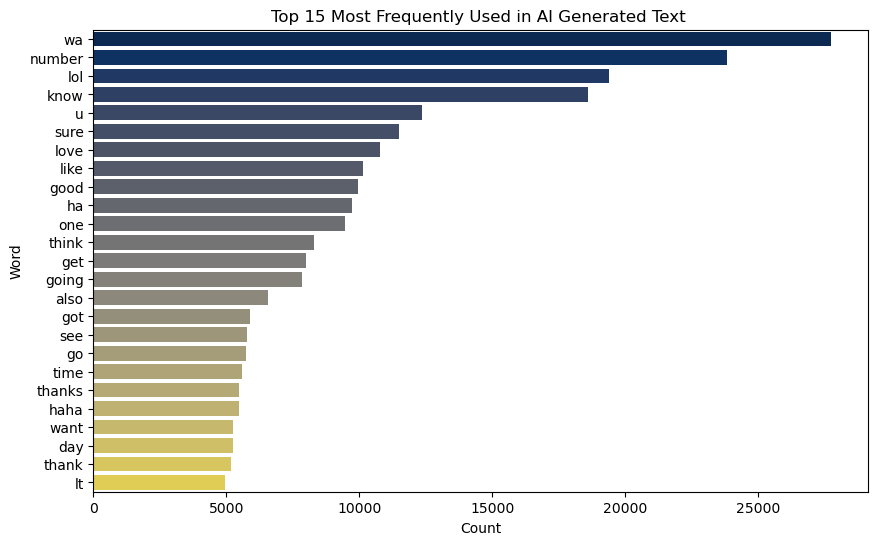

In [49]:
# Used to create a DataFrame for visualization of word count 
word_counts_df = pd.DataFrame(ai_text_word_counts.items(), columns=['Word', 'Count'])

# Sort the DataFrame by count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=word_counts_df.head(25), palette='cividis')
plt.title('Top 15 Most Frequently Used in AI Generated Text ')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

Here, we observe common words such as 'was,' 'number,' 'lol,' 'u,' 'love,' 'like,' 'good,' 'one,' 'get,' 'know,' 'has,' 'URL.' Having these words present in both human-generated and AI-generated text prompts the question of which vectorization method to choose. TF-IDF, considering both the frequency of the word and its distinctiveness, seems reasonable. However, given that most top words are identical, TF-IDF might assign low values to these words due to their lack of uniqueness. Further vectorization methods, such as word2vec, can be considered. However, due to the computational load that will be created by an increase in dimensionality with word2vec, we will opt for TF-IDF since it reduces dimensionality as well as accounts for the frequency and uniqueness of the words.

Before we proceed with vectorizing, let's create a word cloud for a visual presentation of the words.

A word cloud is a graphical representation of text data where the size of each word is proportional to its frequency in the text. More frequent words are displayed with bigger and bolder fonts, while less frequent words are shown with smaller and lighter fonts. The size of each word is proportional to its frequency.
Let's create a word cloud to see the visual representation of the text data.

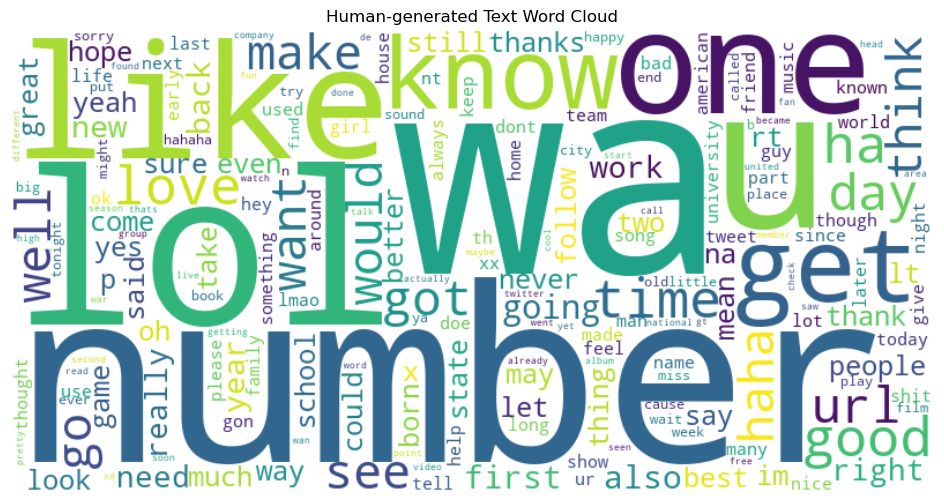

In [50]:
#Used for generating a WordCloud from the frequencies in the human-generated text
human_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(human_text_word_counts)

# Plot WordCloud for human generated text
plt.figure(figsize=(12, 6))
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human-generated Text Word Cloud')
plt.axis('off')
plt.show()


The word cloud for the human-generated text shows that 'Wa,' 'number,' 'lol,' and 'know' are some of the most frequently used words.

Let's do WordCloud for ai generated text

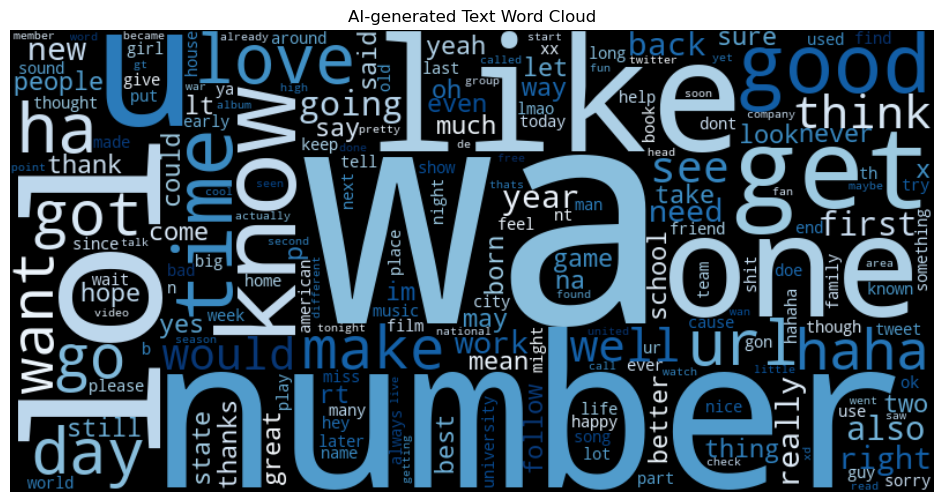

In [51]:
#Used for generating a WordCloud from the frequencies in the AI-generated text
ai_wordcloud = WordCloud(width=800, height=400, colormap='Blues').generate_from_frequencies(human_text_word_counts)

# Plot Word Cloud for AI-generated text
plt.figure(figsize=(12, 6))
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('AI-generated Text Word Cloud')
plt.axis('off')
plt.show()

There, we see 'wa,' 'number,' 'lol,' 'like,' and 'unknown' are the most frequently used words in the AI-generated text.

Before we implement the TF-IDF vectorization method, let's tokenize, lemmatize, remove the stopwords, and save the changes in the output text for further analysis.

In [52]:
# Used for Tokenization
concat_subset_data['output_text'] = concat_subset_data['output_text'].apply(word_tokenize)
concat_subset_data.head(10)

,output_text,text_source
1242569,"[nice, my, fam, s, all, in, baguio, love, it, ...",0
2261157,"[smh, my, bad, see, when, you, said, stay, up,...",1
6339599,"[this, web, site, is, bugging, and, giving, aw...",1
157183,"[where, the, blue, eyed, monster, at, u, him, ...",1
4466378,"[who, is, the, better, defender, at, number, b...",1
1592051,"[i, am, doing, quite, well, how, are, you, mis...",0
6921125,"[i, don, t, think, i, ve, ever, seen, it]",0
128757,[],0
4053296,"[i, havent, heard, that, one, ima, look, for, it]",1
4414072,"[he, didn, to, win, it, tho, where, you, are, ...",0


In [53]:
#The original code was obtained from MSDS680 but has been modified for Lemmatization the output_text

concat_subset_data['output_text'] = concat_subset_data['output_text'].apply(lambda tokenized_output_text: [wordnet_lemmatizer.lemmatize(word) for word in tokenized_output_text])
concat_subset_data.head()

,output_text,text_source
1242569,"[nice, my, fam, s, all, in, baguio, love, it, ...",0
2261157,"[smh, my, bad, see, when, you, said, stay, up,...",1
6339599,"[this, web, site, is, bugging, and, giving, aw...",1
157183,"[where, the, blue, eyed, monster, at, u, him, ...",1
4466378,"[who, is, the, better, defender, at, number, b...",1


Now that we see the words are tokenized in the output text, let's reduce the words to their base form for better feature extraction and building a reliable machine learning model.

Now, let's remove the stop words from the output text and save it in the "output_text" column.

In [54]:
#code below is obtained https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

# Remove stopwords
concat_subset_data['output_text'] = concat_subset_data['output_text'].apply(lambda tokenized_output_text: [word for word in tokenized_output_text if word not in stop_words])
concat_subset_data

,output_text,text_source
1242569,"[nice, fam, baguio, love]",0
2261157,"[smh, bad, see, said, stay, didnt, know, meant...",1
6339599,"[web, site, bugging, giving, away, ipad, numbe...",1
157183,"[blue, eyed, monster, u, chunky, come, recycle...",1
4466378,"[better, defender, number, b, young, napoli]",1
...,...,...
5291266,"[hmm, would, rather, team, cena, orton]",0
5117980,"[used, taken, number, hr]",0
5601768,"[know, someone, one, cheap, well, got, idea, etc]",1
4484935,"[seen, arsenal, team, trophy, past, team, even...",1


Now that the data is clean and ready to be vectorized, let's find out whether or not there is a class imbalance in the target variable, as class imbalance can lead to biased models.

In [55]:
# Count unique classes in the target variable  'text source' column
class_counts = concat_subset_data['text_source'].value_counts()
print(class_counts)

text_source
1    200053
0    199947
Name: count, dtype: int64


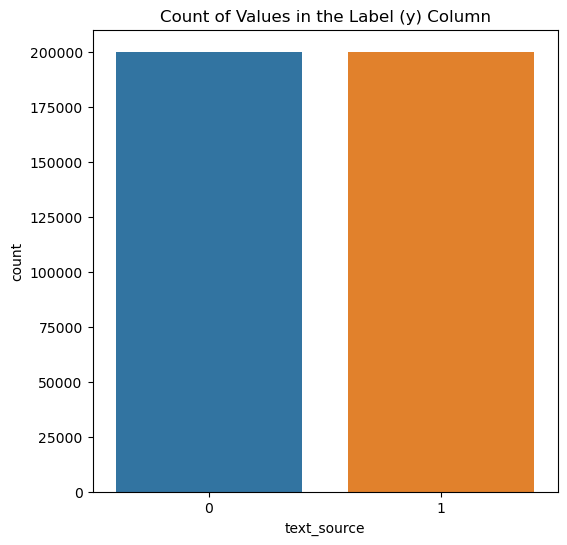

In [56]:
# Create a bar plot to visualize the count of values in the 'y' column
plt.figure(figsize=(6, 6)) 
sns.countplot(x='text_source', data=concat_subset_data)  
plt.title('Count of Values in the Label (y) Column')  
plt.show()

There are no class imbalances, so there is no need to balance the data. Now, let's vectorize the data.

# Vectorization

TF-IDF method is chosen over count vectorization and Word2Vec to develop the models.The reason of the chose TF-IDF vectorization over count vectorization is that TF-IDF considers both the frequency and uniqueness of words, whereas count vectorization only utilizes the frequency of words. In  Exploratory Data Analysis (EDA) performed above , the top word count for AI-generated versus human-generated text, we observed that most of the words in the top 15 in AI-generated text are also present in human-generated text but with different frequencies. Due to this observation, TF-IDF can be effectively utilized. The other reason to chose TF-IDF over Word2Vec is that, since we are going to using Random Forest as one of the models, employing such a vectorization method can prevent the creation of a high-dimensional space, which would lead to a heavy computational load when using Random Forest. Additionally, developing the model with high-dimensional data might pose challenges, potentially leading to overfitting and introducing bias in predictions.

In [57]:
# Used to concatenate the  'output_text' column into a single string for TF-IDF vectorization
concat_subset_data['output_text'] = concat_subset_data['output_text'].apply(' '.join)

In [58]:
# Used to instantiate TF-IDF vectorizer 
vectorizer = TfidfVectorizer()

# Used to vectorize the output_text and save it into a TF-IDF matrix X 
X = vectorizer.fit_transform(concat_subset_data['output_text'])


# Model Selection

Logistic regression, Bernoulli Naive Bayes, and Random Forest are selected for this project. The choice of these three models is based on their differences in simplicity and their approach to processing data. Since the text data is complex and challenging due to its high-dimensional nature, employing different approaches can enable the construction of a model that is less biased.

Logistic regression assumes that features have linear relationships. However, given the complexity and high-dimensionality of text data, establishing linear relationships between features is challenging. Despite this, logistic regression offers relatively simple interpretability and computational efficiency.In contrast, the including of Random Forest is considered necessary since its approach can handle complex and non-linear relationships. It performs well on complex data and exhibits robustness against overfitting. Taking into account the uncertainty regarding the presence of linear relationships in the text, incorporating Random Forest is crucial.
Bernoulli Naive Bayes is also chosen because it works effectively with high-dimensional data, demonstrating fast and computational efficiency. Its assumption of features' independence from each other allows us to apply the Naive Bayes approach to our data.

Overall, utilizing these three models with distinct approaches can result in a more reliable and accurate model for development and selection among the three approaches. This consideration is essential, given the diverse characteristics and challenges posed by the text data.

# Model Evaluation

Accuracy is used as a major metric for evaluating the models, as both false positives and false negatives have equal consequences. This means that we want the model to correctly minimize both false positive and false negative identifications, using accuracy as a primary evaluation metric. However, additional metrics such as confusion matrix, and classification report are employed to assess the overall performance of the models.

Let's develop the models 



## Logistic Regression 


In [59]:
# Used to asigned  the text source to variable y
y = concat_subset_data['text_source']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
#Initialize LogisticRegression model
logreg = LogisticRegression(random_state=42)

#Train the LogisticRegression model
logreg.fit(X_train, y_train)

# Make predictions 
logreg_preds_train=logreg.predict(X_train)
logreg_preds_test = logreg.predict(X_test)


### Logistics Regression Accuracy Score for Training and Test 


In [61]:
#Used to get training and testing accuracy score
print("\nTraining Accuracy score:",accuracy_score(y_train, logreg_preds_train))
print("Testing Accuracy score:",accuracy_score(y_test, logreg_preds_test))



Training Accuracy score: 0.6884625
Testing Accuracy score: 0.6268375


Here, the training set has a higher accuracy of 69% than the testing accuracy of 63%. This is typical; however, if there is a significant difference, it might be an indication of overfitting. We will continue to observe the training and testing accuracy scores in the next two models to investigate if there is overfitting.

### Logistics Regression Classification Report 

In [62]:
# Classification Report on Test
logreg_test_class_report = classification_report(y_test, logreg_preds_test )
print("Testing Classification Report for Logistic Regression:")
print(logreg_test_class_report)


Testing Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61     40091
           1       0.61      0.67      0.64     39909

    accuracy                           0.63     80000
   macro avg       0.63      0.63      0.63     80000
weighted avg       0.63      0.63      0.63     80000



The Logistic Regression Classification Report shows that this model is better at identifying Class 1 than Class 0 since it has a higher recall value for Class 1 than Class 0. The precision of the model for both Class 1 and Class 0 is similar. Based on the precision, the model performs better for Class 1 than for Class 0.

Here, we observe that the accuracy on the test dataset is 63%. The F1 wich indicates a harmonic balance between precision and recall performance score for Class 0 is 61%, and for Class 1, it is 64%.

### Logistics Regression Confusion Matrix for Test Data

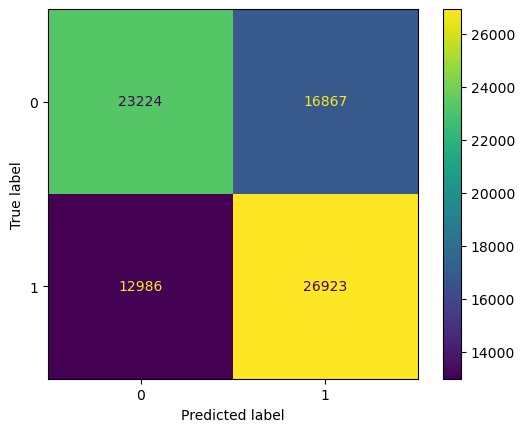

In [63]:
# Confusion matrix on testing data 
logreg_test_conf_matri = confusion_matrix(y_test, logreg_preds_test )
disp = ConfusionMatrixDisplay(confusion_matrix=logreg_test_conf_matri)
disp.plot()
plt.show()

Here, the model predicted 26,923 texts as human-generated (Class 1) out of 80,000 texts and 23,224 texts as Class 0 out of 80,000 texts. 


Let's develop a Bernoulli Naive Bayes model.

## Bernoulli Naive Bayes Model Selection and Evaluation 

In [64]:
#Initialize Bernoulli Naive Bayes model
ber_nb= BernoulliNB()

#Train  Bernoulli Naive Bayes model 
ber_nb.fit(X_train, y_train)

# Make predictions 
ber_nb_Preds_train = ber_nb.predict(X_train)
ber_nb_preds_test = ber_nb.predict(X_test)

### Bernoulli Naive Bayes Accuracy Score for Training and Test 

In [65]:
#Used to get training and testing accuracy score
print("\nTraining Accuracy score:",accuracy_score(y_train, ber_nb_Preds_train))
print("Testing Accuracy score:",accuracy_score(y_test, ber_nb_preds_test))


Training Accuracy score: 0.609290625
Testing Accuracy score: 0.5676375


Here, also, the accuracy scores of the training and test data show different values. Since the difference is not too pronounced, it may not be an indication of overfitting. However, I will investigate the results of the random forest before we can conclude that there is no overfitting.

### Bernoulli Naive Bayes Classification Report

In [66]:
# Classification Report
ber_nb_class_report = classification_report(y_test, ber_nb_preds_test )
print("Classification Report for Bernoulli Naive Bayes Model:")
print(ber_nb_class_report)

Classification Report for Bernoulli Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.55      0.81      0.65     40091
           1       0.63      0.33      0.43     39909

    accuracy                           0.57     80000
   macro avg       0.59      0.57      0.54     80000
weighted avg       0.59      0.57      0.54     80000



Here, the Naive Bayes model performs worse on accuracy (57%)compared to the logistic regression model above. However, it did perform well in identifying AI-generated texts, showing an 81% identification rate for class 0 (AI-generated texts). It seems to be a better model for identifying only AI-generated texts than the logistic regression model above.

### Bernoulli Naive Bayes Confusion matrix

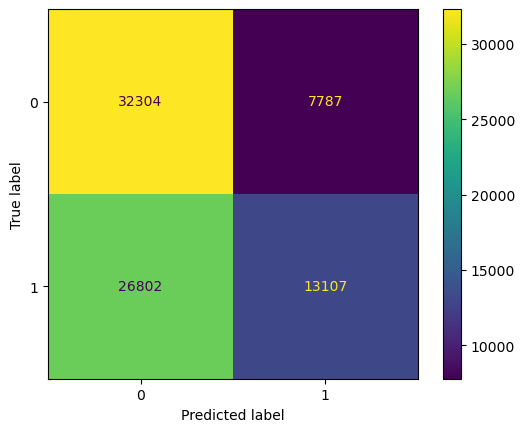

In [67]:
# Confusion matrix on testing data
ber_nb_reg_conf_matri = confusion_matrix(y_test, ber_nb_preds_test )
disp = ConfusionMatrixDisplay(confusion_matrix=ber_nb_reg_conf_matri)
disp.plot()
plt.show()

Here, it  shows how good the model is at identifying AI-generated text comparing to Logistics Regression , as it correctly identified 32,304 out of 80,000 instances. However, this model is worse than the Logistic Regression model at predicting true positives or human-generated text, as it correctly predicted 13,107 human-generated texts out of 80,000.

Now Let's develop Random Forest Classifier

## Random Forest Classifier Model Selection and Evaluation 

In [68]:
# Initialize models
rf = RandomForestClassifier(random_state=42)

#Train RandomForestClassifier model
rf.fit(X_train, y_train)

# Make predictions for each classifier
rf_preds_train=rf.predict(X_train)
rf_preds_test = rf.predict(X_test)


 ### Random Forest Classifier  Accuracy Score for Training and Test 

In [69]:
# Used to print accuracy score
print("\nTraining Accuracy score:",accuracy_score(y_train, rf_preds_train))
print("Testing Accuracy score:",accuracy_score(y_test, rf_preds_test))


Training Accuracy score: 0.946775
Testing Accuracy score: 0.6631125


Here, we observe that the training accuracy rate , which is 94%, is higher than the testing accuracy score of 66%. However, since the differences are very high, this is an indication of overfitting. Since we suspect there is overfitting in the data, we can use text truncation and evaluate the model. before we do that lets continue evaluating the random forest model 

 ### Random Forest Classifier Classification Report

In [70]:
# Classification Report
rf_class_report = classification_report(y_test, rf_preds_test )

# Print Classification Reports
print("Classification Report for Random Forest:")
print(rf_class_report)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61     40091
           1       0.63      0.79      0.70     39909

    accuracy                           0.66     80000
   macro avg       0.68      0.66      0.66     80000
weighted avg       0.68      0.66      0.66     80000



The random forest model is a better model compared to logistic regression and Bernoulli Naive Bayes, as it has a higher accuracy rate of 66%. This model also has a 72% correct prediction for class 0 and a 63% correct prediction for class 1. When it comes to recall, the model identified or recalled 79% of class 1 instances and 53% of class 0.

  ### Random Forest Classifier Confusion Matrix

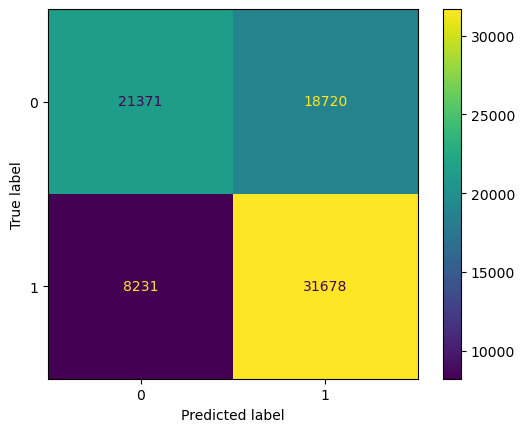

In [71]:
rf_conf_matri = confusion_matrix(y_test, rf_preds_test)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matri)
disp.plot()
plt.show()


Here, we observe that the random forest model performed better than the other models in predicting human-generated texts which is class 1. It predicted 31678 instances correctly out of 80000 instances.  However, it did not perform well in predicting text generated by AI. It accurately predicted 21371 instances as AI-generated text. Despite this, the overall accuracy score is better than the other two models.

Now, let's investigate the parameters of this random forest model, as doing so can enable us to perform a cross-validation grid search (CV) to find a better performing model

## Random Forest Classifier Using Grid Search CV

In [76]:
# code source https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Look at parameters used by our current forest
print('Parameters used in the above rf model :\n')
pprint(rf.get_params())

Parameters used in the above rf model :

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Now that we know our base model parameters, it appears we can use hyperparameter tuning to find a better-performing model.

In [98]:
# code source  https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Define the parameter grid to search
param_grid = {
    'n_estimators': [200,300],
    'max_depth': [50,100, None],
    'min_samples_split': [ 6, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True],
    'max_features': ['sqrt']
}

In [99]:
# orginal code code source  https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


In [100]:
# Used to Fit the grid search 
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=13.1min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=18.4min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=10.4min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=20.4min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=10.0min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=50.4min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [50, 100, None],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [6, 10],
                         'n_estimators': [200, 300]},
             verbose=2)

Now that the grid search is done, let's print the best parameters among the given parameters that we determined earlier.

In [101]:
#code source  https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}


Now we have the best parameter, Let's initialize a model for evaluation 

### Random Forest Classifier with Best Hyperparameters from Grid Search CV: Model Selection and Evaluation

In [102]:
#code source  https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Used to initializing  best model from the random forest with the best hyperparameters
best_rf_model = grid_search.best_estimator_


In [103]:
# Make predictions Using random forest with best hyperparameter from Grid search cv
best_rf_preds_train=best_rf_model.predict(X_train)
best_rf_preds_test = best_rf_model.predict(X_test)

### Random Forest Classifier  Best Hyperparameters from Grid Search CV Accuracy Score for Training and Test 

In [122]:
print("\nTraining Accuracy score:",accuracy_score(y_train, best_rf_preds_train))
print("Testing Accuracy score:",accuracy_score(y_test, best_rf_preds_test))


Training Accuracy score: 0.946653125
Testing Accuracy score: 0.665575


Here, we improved the Random Forest model from 0.6631125 to 0.665575. However, the training accuracy score and testing accuracy score have a higher difference, which is an indication of overfitting. To address this, I will check the length of the texts, as a great variation in text length may contribute to the overfitting. For now, let's continue evaluating this model.

### Random Forest Classifier with Best Hyperparameters from Grid Search CV Classification Report

In [104]:
# Generate a classification report
best_rf_report = classification_report(y_test, best_rf_preds_test)

# Print the classification report
print("Classification Report:\n", best_rf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.52      0.61     40091
           1       0.63      0.81      0.71     39909

    accuracy                           0.67     80000
   macro avg       0.68      0.67      0.66     80000
weighted avg       0.68      0.67      0.66     80000



This model shows an increase of correct predictions for class 0 by 1, an increase in the recall of class 1 by 2, and a decrease in the recall of class 0 by 1 compared to the previous Random Forest above. Using the Grid Search CV increased the accuracy of our Random Forest from 66% to 67%

### Random Forest Classifier with Best Hyperparameters from Grid Search CV Confusion matrix

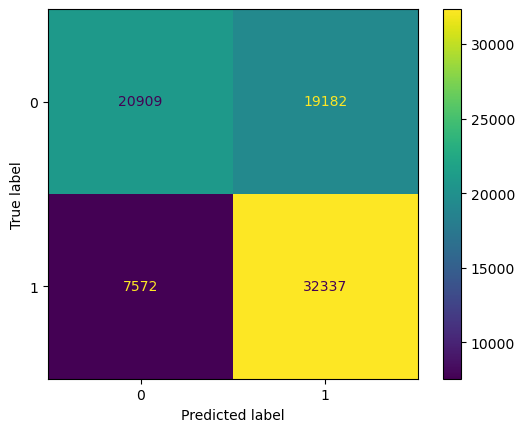

In [105]:
# Used to get confusion matrix
best_rf_conf_matri = confusion_matrix(y_test, best_rf_preds_test)
disp = ConfusionMatrixDisplay(confusion_matrix=best_rf_conf_matri)
disp.plot()
plt.show()

This model also shows 20,909 correct predictions of class 0 (AI-generated text) and 32,337 correct predictions of class 1 (human-generated text). The model demonstrates an increase in the accuracy of predicting human-generated text from 31,678 to 32,337; however, it decreases the correct prediction of class 0 from 21,371 to 20,909 compared to the previous Random Forest model. Since our goal is to produce a more accurate model, the model obtained by Grid Search CV, which has an accuracy of 67%, is the best so far.


# Development and Evaluation of Models Using Truncated Text Data

Knowing the big difference in accuracy scores between the training and test datasets for the Random Forest, it's crucial to explore the lengths of the longest and shortest texts. This exploration(developing models using truncated data text) aims to shed light on whether text truncation plays a role in affecting the model performance  and potentially reducing overfitting and increase our models accuracy.

Knowing that our models, unlike those such as Recurrent Neural Networks(RNN's) highly sensitive to text structure and sequence, are generally less affected by these aspects. Nevertheless, let's thoroughly investigate whether text length has an impact on our models.

To initiate this investigation, let's first examine the shortest and longest texts in the dataset.

In [106]:
# Orginal code https://stackoverflow.com/questions/61280795/to-print-string-which-has-max-length-in-python-dataframe-column

# Find the longest and shortest text lengths
longest_text = max(concat_subset_data['output_text'], key=len)
shortest_text = min(concat_subset_data['output_text'], key=len)

# Print the results
print("Length of Longest Text:", len(longest_text))

print("Length of Shortest Text:", len(shortest_text))

Length of Longest Text: 9112
Length of Shortest Text: 0


To make sure we exclude entries with zero text, we've set the minimum length to be 1.

Here we see that the text length varies from 0 to 9112.We've identified instances where the text length is 0, indicating a potential need for further data cleaning to optimize model performance. While our initial data analysis revealed no missing datasets, the presence of zero-length text entries could introduce noise, particularly affecting models like Bernoulli Naive Bayes and Logistic Regression. However, it's expected to have a milder impact on our RandomForest since it is known for its robustness to noise.

Our next step involves exploring model performance. We'll start with a minimum length of 1 and iteratively select random maximum lengths until finding the maximum length that yields a higher accuracy rate for the models.

In [107]:
# Use to set the minimum and maximum lenght of the text
min_length = 1
max_length = 150

# Used to truncate the data to 1-150 in length
concat_subset_data['truncated_text'] = concat_subset_data['output_text'].apply(lambda x: x[min_length:max_length])


Through trial and error, we determined that a maximum length of 150 produces the highest accuracy rate for the models mentioned below.

Now Let's Vectorize the truncated text using TF-IDF

In [108]:
# Used to instantiate TF-IDF vectorizer 
vectorizer2 = TfidfVectorizer()

# Used to vectorize truncated text  and save it into a TF-IDF matrix X 
X = vectorizer2.fit_transform(concat_subset_data['truncated_text'])

In [109]:
# Used to asigned  the text source to variable y
y = concat_subset_data['text_source']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistics Regression 

In [110]:
#Initialize LogisticRegression model
logreg_trunc = LogisticRegression(random_state=42)

#Train the LogisticRegression model using truncated text
logreg_trunc.fit(X_train, y_train)

# Make predictions using truncated text
logreg_preds_trunc_train=logreg_trunc.predict(X_train)
logreg_preds_trunc_test = logreg_trunc.predict(X_test)

### Logistics Regression Accuracy Score for Training and Test 

In [111]:
# Print training and testing accuracy score
print("\nTraining Accuracy score:",accuracy_score(y_train, logreg_preds_trunc_train))
print("Testing Accuracy score:",accuracy_score(y_test, logreg_preds_trunc_test))



Training Accuracy score: 0.7026125
Testing Accuracy score: 0.632625


The logistic regression classifier trained and tested with truncated data shows an increase in both the training dataset and test accuracy scores. Previously, we had 0.6884625 accuracy on testing and 0.6268375 on training using untruncated or raw data. Now, with truncated data, the model has improved to 0.7026125for training and 0.632625 for testing data.

### Logistics Regression Classification Report 

In [112]:
# Classification Report
logreg_turnc_class_report = classification_report(y_test, logreg_preds_trunc_test)

# Print Classification Reports
print("Classification Report for Logistics Regression:")
print(logreg_turnc_class_report)

Classification Report for Logistics Regression:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61     40091
           1       0.62      0.70      0.65     39909

    accuracy                           0.63     80000
   macro avg       0.64      0.63      0.63     80000
weighted avg       0.64      0.63      0.63     80000



Comparing it to the logistic regression model that used raw data, the precision for class 0 and class 1 increased from 0.64 to 0.65 and 0.61 to 0.62, respectively. It also increased the recall of class 1 to 0.70 from 0.67. However, the recall decreased from 0.58 to 0.57.

### Logistics Regression Confusion Matrix 

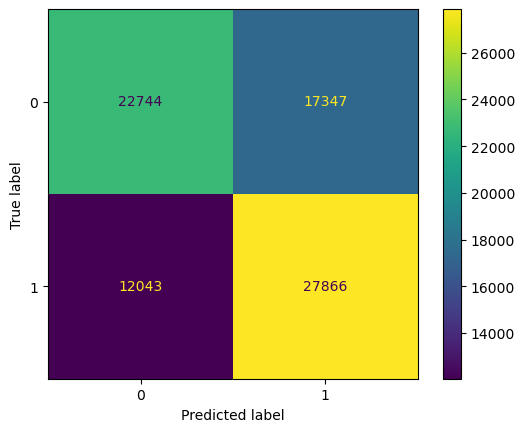

In [113]:
# Confusion matrix on testing data 
logreg_trunc_test_conf_matri = confusion_matrix(y_test, logreg_preds_trunc_test )
disp = ConfusionMatrixDisplay(confusion_matrix=logreg_trunc_test_conf_matri)
disp.plot()
plt.show()

The number of correctly predicted instances of class 1 rising; however, it reduces the correct identification of instances in class 0.

## Bernoulli Naive Bayes  

In [114]:
#Initialize Bernoulli Naive Bayes model
ber_nb_trunc= BernoulliNB()

#Train  Bernoulli Naive Bayes model 
ber_nb_trunc.fit(X_train, y_train)

# Make predictions 
ber_nb_Preds_trunc_train = ber_nb_trunc.predict(X_train)
ber_nb_preds_trunc_test = ber_nb_trunc.predict(X_test)

### Bernoulli Naive Bayes Accuracy Score for Training and Test 

In [115]:
print("\nTraining Accuracy score:",accuracy_score(y_train, ber_nb_Preds_trunc_train))
print("Testing Accuracy score:",accuracy_score(y_test, ber_nb_preds_trunc_test))


Training Accuracy score: 0.677465625
Testing Accuracy score: 0.6115875


Using the truncated data, the accuracy score for both the training and testing scores of the Bernoulli Naive Bayes increased from 61% and 57% to 68 %and 61%, respectively.

### Bernoulli Naive Bayes Classification Report

In [116]:
# Classification Report
ber_nb_turnc_class_report = classification_report(y_test, ber_nb_preds_trunc_test)

# Print Classification Reports
print("Classification Report for Bernoulli Naive Bayes:")
print(ber_nb_turnc_class_report)

Classification Report for Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64     40091
           1       0.63      0.54      0.58     39909

    accuracy                           0.61     80000
   macro avg       0.61      0.61      0.61     80000
weighted avg       0.61      0.61      0.61     80000



The precision of class 0 increased from 0.55 to 0.60 with no change in the precision of class 1. The recall decreased from 0.80 to 0.68 for class 0 and increased for class 1 from 0.33 to 0.54.

### Bernoulli Naive Bayes Confusion Matrix

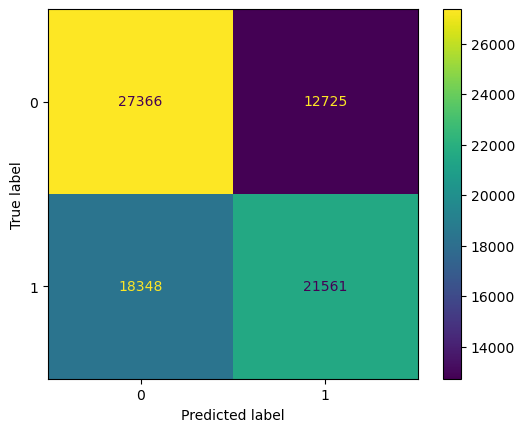

In [117]:
# Confusion matrix on testing data 
ber_nb_trunc_test_conf_matri = confusion_matrix(y_test, ber_nb_preds_trunc_test)
disp = ConfusionMatrixDisplay(confusion_matrix=ber_nb_trunc_test_conf_matri)
disp.plot()
plt.show()

Here, the model shows an improvement in the prediction of class 1 (human-generated texts) compared to the same model that was trained and tested on an untruncated dataset. The correctly predicted instances of class 1 increased from 13,107 to 21,561, and the correctly predicted instances of class 0 (AI-generated) decreased from 32,304 to 27,366.

# Random Forest Classifier  

In [118]:
# Initialize models for 
rf_trunc = RandomForestClassifier(random_state=42)

#Train RandomForestClassifier model
rf_trunc.fit(X_train, y_train)

# Make predictions for each classifier
rf_preds_trunc_train=rf_trunc.predict(X_train)
rf_preds_trunc_test = rf_trunc.predict(X_test)

### Random Forest Classifier Accuracy Score for Training and Test 

In [119]:
print("\nTraining Accuracy score:",accuracy_score(y_train, rf_preds_trunc_train))
print("Testing Accuracy score:",accuracy_score(y_test, rf_preds_trunc_test))


Training Accuracy score: 0.946234375
Testing Accuracy score: 0.6537875


The test accuracy rate for the Random Forest classifier is the lowest when compared to the Random Forest trained on untruncated data and the Random Forest with the best hyperparameters found through grid search CV.

### Random Forest Classifier Classification Reports

In [120]:
# Classification Report
rf_turnc_class_report = classification_report(y_test, rf_preds_trunc_test)

# Print Classification Reports
print("Classification Report for Random Forest:")
print(rf_turnc_class_report)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.52      0.60     40091
           1       0.62      0.78      0.69     39909

    accuracy                           0.65     80000
   macro avg       0.67      0.65      0.65     80000
weighted avg       0.67      0.65      0.65     80000



This Random Forest, when compared to the Random Forest trained and tested on untruncated data and the Random Forest found in grid search, produces the lowest precision and recall.

### Random Forest Classifier Confusion Matrix

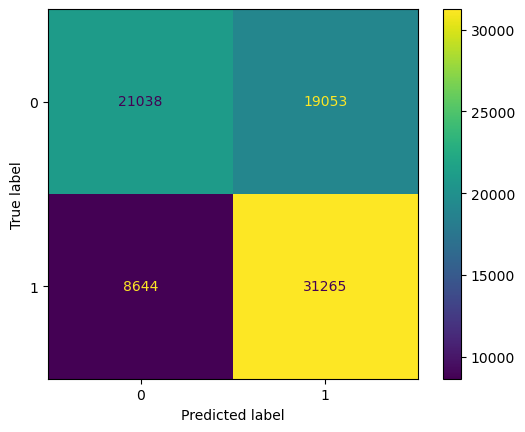

In [121]:
# Confusion matrix on testing data 
rf_turnc_conf_matri = confusion_matrix(y_test, rf_preds_trunc_test)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_turnc_conf_matri)
disp.plot()
plt.show()

This model produced lower accuracy in the prediction of class 1 compared to the other random forest models. However, it shows better correct predictions for class 0 compared to the random forest found by grid search CV.

# Conclusions 

The primary goal of this project is to develop a model with a higher accuracy rate. Since there was no class imbalance in our data, we utilized accuracy as the primary metric. Evaluation of the models involved the use of a classification report and confusion matrix. Recognizing that our models are minimally affected by text length, our aim is to explore whether text truncation influences model performance, potentially reducing overfitting and enhancing accuracy.

The results indicate that text truncation does impact model accuracy. It increased the accuracy of the Bernoulli model from 57% to 61% and improved Logistic Regression accuracy from 0.6268375 to 0.632625. However, it decreased the accuracy of the Random Forest to 65% from the initially observed 67% in GridSearch and 66% using untruncated data. This decline may be attributed to the loss of information during text truncation.

Overall, Random Forest, identified through GridSearchCV, exhibited the best performance among the developed models with an accuracy of 67%. To further enhance our work, fine-tuning using GridSearchCV, increasing training data, and employing more advanced machine learning algorithms are recommended to potentially improve model performance.

## References

Koehrsen, W. (2018, January 10). Hyperparameter tuning the random forest in python. Medium. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 

Mukaffimoin. (2024, January 14). Ai vs human text detection. Kaggle. https://www.kaggle.com/code/mukaffimoin/ai-vs-human-text-detection 

NaveenFream. (2023, September 22). Ai-and-human text. Kaggle. https://www.kaggle.com/datasets/naveenfream/ai-and-human-text 

OpenAI. (n.d.). https://openai.com/chatgpt 

pkrishpkrish 7111 silver badge1010 bronze badges, & Umar.HUmar.H22.8k77 gold badges4242 silver badges8282 bronze badges. (1966b, March 1). To print string which has max length in Python dataframe column. Stack Overflow. https://stackoverflow.com/questions/61280795/to-print-string-which-has-max-length-in-python-dataframe-column 


Stephan, Y. (n.d.). | NLP | LLM | Fine-tuning | QA LoRA T5 | Natural Language Processing (NLP) and Large Language Models (LLM) with Fine-Tuning LLM and make Question answering (QA) with LoRA and Flan-T5 Large. GitHub. https://github.com/YanSte/NLP-LLM-Fine-tuning-QA-LoRA-T5/blob/dff62be80fd83b97c2997e1e2c7fd954fb901a54/nlp-llm-fine-tuning-lora-t5-l.ipynb 









